In [1]:
import pandas as pd

In [2]:
df_repo = pd.read_csv(r"data/1_repo_info.csv")

In [3]:
df_repo.head()

,repo_id,repo_owner,repo_name,created_at,project_size,num_forks,num_stars,default_branch,last_update,is_archived,repo_url,teammate
0,17165658,apache,spark,2014-02-25T08:00:08Z,488587,28487,40503,master,2025-02-10T20:44:29Z,False,https://github.com/apache/spark,helen
1,4710920,apache,dubbo,2012-06-19T07:56:02Z,59419,26459,40715,3.3,2025-02-10T15:11:41Z,False,https://github.com/apache/dubbo,helen
2,9185792,apache,echarts,2013-04-03T03:18:59Z,245106,19696,61824,master,2025-02-10T17:32:09Z,False,https://github.com/apache/echarts,helen
3,33884891,apache,airflow,2015-04-13T18:04:58Z,335686,14621,38678,main,2025-02-10T20:09:28Z,False,https://github.com/apache/airflow,helen
4,39464018,apache,superset,2015-07-21T18:55:34Z,703502,14423,64336,master,2025-02-10T19:52:42Z,False,https://github.com/apache/superset,helen


In [4]:
print(df_repo.isnull().sum())

repo_id           0
repo_owner        0
repo_name         0
created_at        0
project_size      0
num_forks         0
num_stars         0
default_branch    0
last_update       0
is_archived       0
repo_url          0
teammate          0
dtype: int64


In [5]:
print(df_repo.duplicated().sum())

0


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

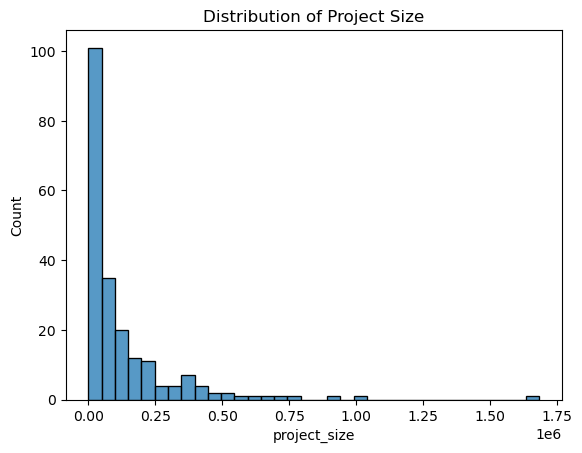

In [7]:
#Check for normality
sns.histplot(df_repo['project_size'])
plt.title("Distribution of Project Size")
plt.show()

In [8]:
df_repo['log_project_size'] = np.log1p(df_repo['project_size'])

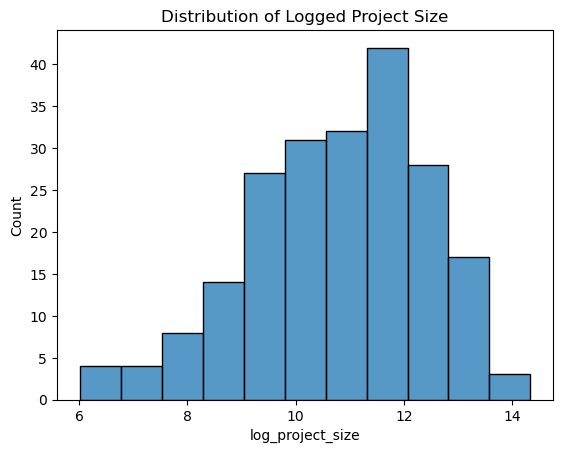

In [9]:
sns.histplot(df_repo['log_project_size'])
plt.title("Distribution of Logged Project Size")
plt.show()

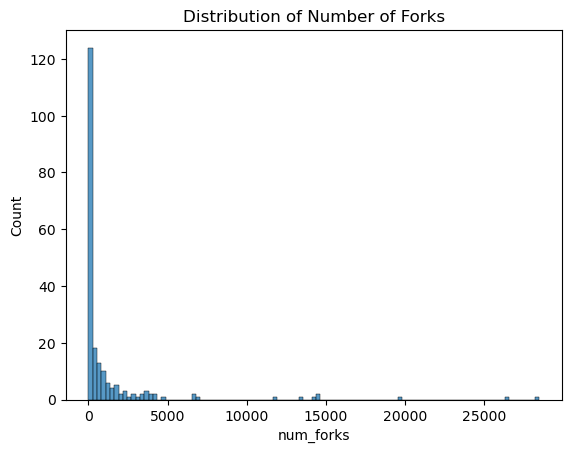

In [10]:
sns.histplot(df_repo['num_forks'])
plt.title("Distribution of Number of Forks")
plt.show()

In [11]:
df_repo['log_num_forks'] = np.log1p(df_repo['num_forks'])

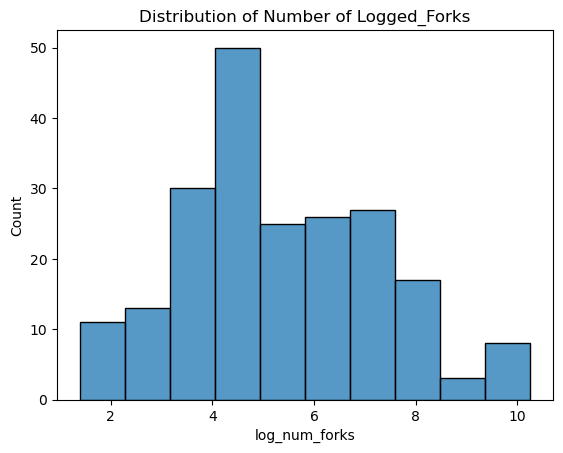

In [12]:
sns.histplot(df_repo['log_num_forks'])
plt.title("Distribution of Number of Logged_Forks")
plt.show()

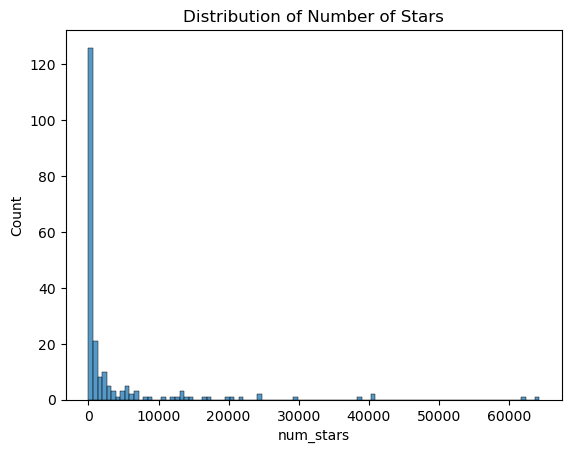

In [13]:
sns.histplot(df_repo['num_stars'])
plt.title("Distribution of Number of Stars")
plt.show()

In [14]:
df_repo['log_num_stars'] = np.log1p(df_repo['num_stars'])

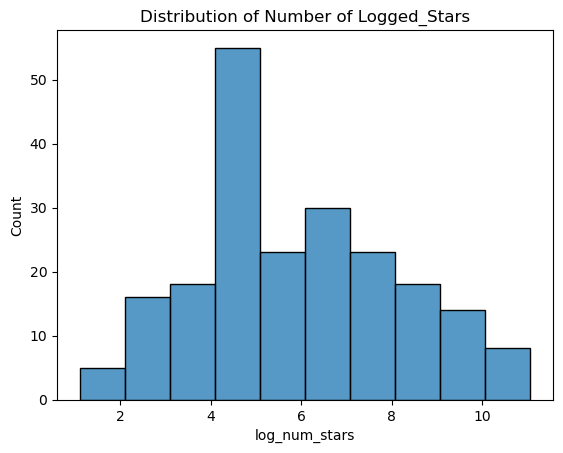

In [15]:
sns.histplot(df_repo['log_num_stars'])
plt.title("Distribution of Number of Logged_Stars")
plt.show()

In [16]:
df_repo.head()

,repo_id,repo_owner,repo_name,created_at,project_size,num_forks,num_stars,default_branch,last_update,is_archived,repo_url,teammate,log_project_size,log_num_forks,log_num_stars
0,17165658,apache,spark,2014-02-25T08:00:08Z,488587,28487,40503,master,2025-02-10T20:44:29Z,False,https://github.com/apache/spark,helen,13.099275,10.257238,10.609156
1,4710920,apache,dubbo,2012-06-19T07:56:02Z,59419,26459,40715,3.3,2025-02-10T15:11:41Z,False,https://github.com/apache/dubbo,helen,10.992386,10.183389,10.614376
2,9185792,apache,echarts,2013-04-03T03:18:59Z,245106,19696,61824,master,2025-02-10T17:32:09Z,False,https://github.com/apache/echarts,helen,12.409450,9.888222,11.032063
3,33884891,apache,airflow,2015-04-13T18:04:58Z,335686,14621,38678,main,2025-02-10T20:09:28Z,False,https://github.com/apache/airflow,helen,12.723934,9.590283,10.563052
4,39464018,apache,superset,2015-07-21T18:55:34Z,703502,14423,64336,master,2025-02-10T19:52:42Z,False,https://github.com/apache/superset,helen,13.463827,9.576649,11.071890


In [17]:
from scipy.stats import pearsonr

# Compute correlation and p-value for each pair
corr1, p1 = pearsonr(df_repo['log_project_size'], df_repo['log_num_forks'])
corr2, p2 = pearsonr(df_repo['log_project_size'], df_repo['log_num_stars'])
corr3, p3 = pearsonr(df_repo['log_num_forks'], df_repo['log_num_stars'])

# Print results
print(f"Correlation between log_project_size and log_num_forks: {corr1}, p-value: {p1}")
print(f"Correlation between log_project_size and log_num_stars: {corr2}, p-value: {p2}")
print(f"Correlation between log_num_forks and log_num_stars: {corr3}, p-value: {p3}")


Correlation between log_project_size and log_num_forks: 0.5772379484836878, p-value: 4.7019774570449874e-20
Correlation between log_project_size and log_num_stars: 0.5619676949951071, p-value: 7.028054942197149e-19
Correlation between log_num_forks and log_num_stars: 0.9712318797536539, p-value: 1.3628748817195124e-131


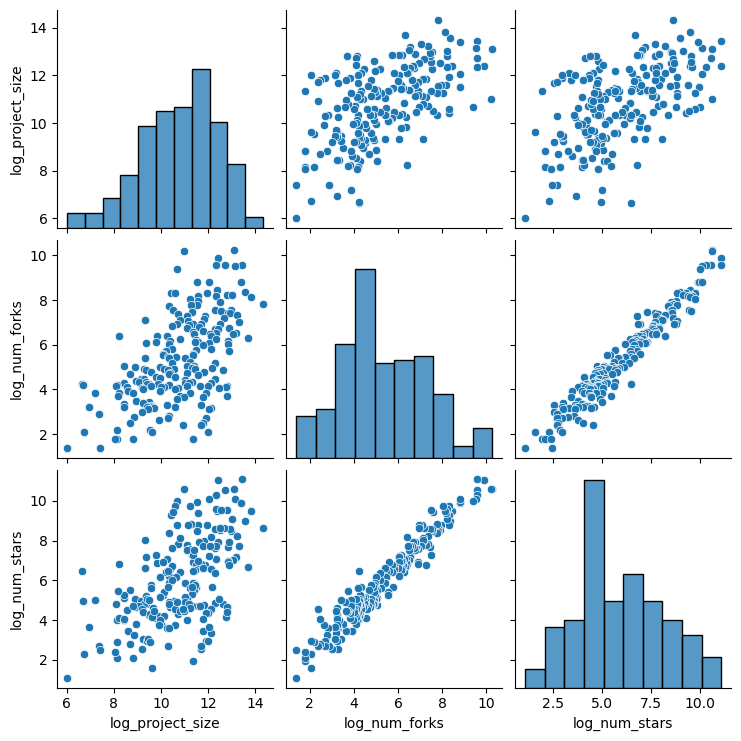

In [18]:
sns.pairplot(df_repo[['log_project_size', 'log_num_forks', 'log_num_stars']])
plt.show()

In [38]:
df_fork = pd.read_csv(r"data/2_fork_info.csv")

In [40]:
df_fork.head()

,repo_id,repo_owner,repo_name,fork_id,fork_owner,fork_owner_id,fork_name,fork_default_branch,fork_created_at,fork_url,teammate
0,160994,apache,sling-old-svn-mirror,28909362,modellar,2305841,sling,trunk,2015-01-07T10:13:26Z,https://github.com/modellar/sling,junlong
1,160994,apache,sling-old-svn-mirror,29391638,kciecierski,1096205,sling,trunk,2015-01-17T13:16:24Z,https://github.com/kciecierski/sling,junlong
2,160994,apache,sling-old-svn-mirror,29487524,buuhuu,558094,sling,trunk,2015-01-19T19:23:06Z,https://github.com/buuhuu/sling,junlong
3,160994,apache,sling-old-svn-mirror,29725639,igool,3281260,sling,trunk,2015-01-23T09:22:06Z,https://github.com/igool/sling,junlong
4,160994,apache,sling-old-svn-mirror,29923712,amishra3,4042612,sling,trunk,2015-01-27T16:45:37Z,https://github.com/amishra3/sling,junlong


In [46]:
df_fork[df_fork["repo_name"] == "spark"]

,repo_id,repo_owner,repo_name,fork_id,fork_owner,fork_owner_id,fork_name,fork_default_branch,fork_created_at,fork_url,teammate
96686,17165658,apache,spark,28679321,chuckchen,459052,spark,master,2015-01-01T02:40:42Z,https://github.com/chuckchen/spark,helen
96687,17165658,apache,spark,28679492,mingsc,10173982,spark,master,2015-01-01T02:57:05Z,https://github.com/mingsc/spark,helen
96688,17165658,apache,spark,28681174,cleaton,200892,spark,master,2015-01-01T05:41:05Z,https://github.com/cleaton/spark,helen
96689,17165658,apache,spark,28681700,sriniwaas,8960467,spark,master,2015-01-01T06:24:07Z,https://github.com/sriniwaas/spark,helen
96690,17165658,apache,spark,28683271,loachli,2426652,spark,master,2015-01-01T08:33:54Z,https://github.com/loachli/spark,helen
...,...,...,...,...,...,...,...,...,...,...,...
122509,17165658,apache,spark,909993626,learnerBlock,25736050,spark,master,2024-12-30T08:30:35Z,https://github.com/learnerBlock/spark,helen
122510,17165658,apache,spark,910043299,sunxiaoguang,3982329,spark,master,2024-12-30T10:59:08Z,https://github.com/sunxiaoguang/spark,helen
122511,17165658,apache,spark,910088295,abubakaraziz,10674679,spark,master,2024-12-30T13:15:22Z,https://github.com/abubakaraziz/spark,helen
122512,17165658,apache,spark,910299845,sandipta05,18501426,spark,master,2024-12-30T23:21:05Z,https://github.com/sandipta05/spark,helen
